# PROBLEM STATEMENT

- In this project, a regression model is developed to predict the probability of being accepted for Graduate school.
- Data Source: https://www.kaggle.com/mohansacharya/graduate-admissions
- Citation: Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019

- The dataset contains the following parameters: 
    - GRE Scores ( out of 340 ) 
    - TOEFL Scores ( out of 120 ) 
    - University Rating ( out of 5 ) 
    - Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) 
    - Undergraduate GPA ( out of 10 ) 
    - Research Experience ( either 0 or 1 ) 
    - Chance of Admit ( ranging from 0 to 1 )

# IMPORT LIBRARIES 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# IMPORT DATASET

In [2]:
admission_df = pd.read_csv('Admission.csv')

In [3]:
admission_df.head(5)

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Admission Chance  
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65

In [5]:
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Admission Chance     400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [4]:
admission_df.describe()

Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  400.000000  400.000000   400.000000         400.000000  400.000000   
mean   200.500000  316.807500   107.410000           3.087500    3.400000   
std    115.614301   11.473646     6.069514           1.143728    1.006869   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    100.750000  308.000000   103.000000           2.000000    2.500000   
50%    200.500000  317.000000   107.000000           3.000000    3.500000   
75%    300.250000  325.000000   112.000000           4.000000    4.000000   
max    400.000000  340.000000   120.000000           5.000000    5.000000   

             LOR         CGPA    Research  Admission Chance  
count  400.000000  400.000000  400.000000        400.000000  
mean     3.452500    8.598925    0.547500          0.724350  
std      0.898478    0.596317    0.498362          0.142609  
min      1.000000    6.800000    0.000000          0.340000  
25%      3.000000    8.170000    0.000000          0.640000  
50%      3.500000    8.610000    1.000000          0.730000  
75%      4.000000    9.062500    1.000000          0.830000  
max      5.000000    9.920000    1.000000          0.970000

# VISUALIZE DATASET

In [5]:
admission_df = admission_df.drop(['Serial No.'], axis = 1)

In [7]:
admission_df.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0        337          118                  4  4.5   4.5  9.65         1   
1        324          107                  4  4.0   4.5  8.87         1   
2        316          104                  3  3.0   3.5  8.00         1   
3        322          110                  3  3.5   2.5  8.67         1   
4        314          103                  2  2.0   3.0  8.21         0   

   Admission Chance  
0              0.92  
1              0.76  
2              0.72  
3              0.80  
4              0.65

In [8]:
column_headers = admission_df.columns.values

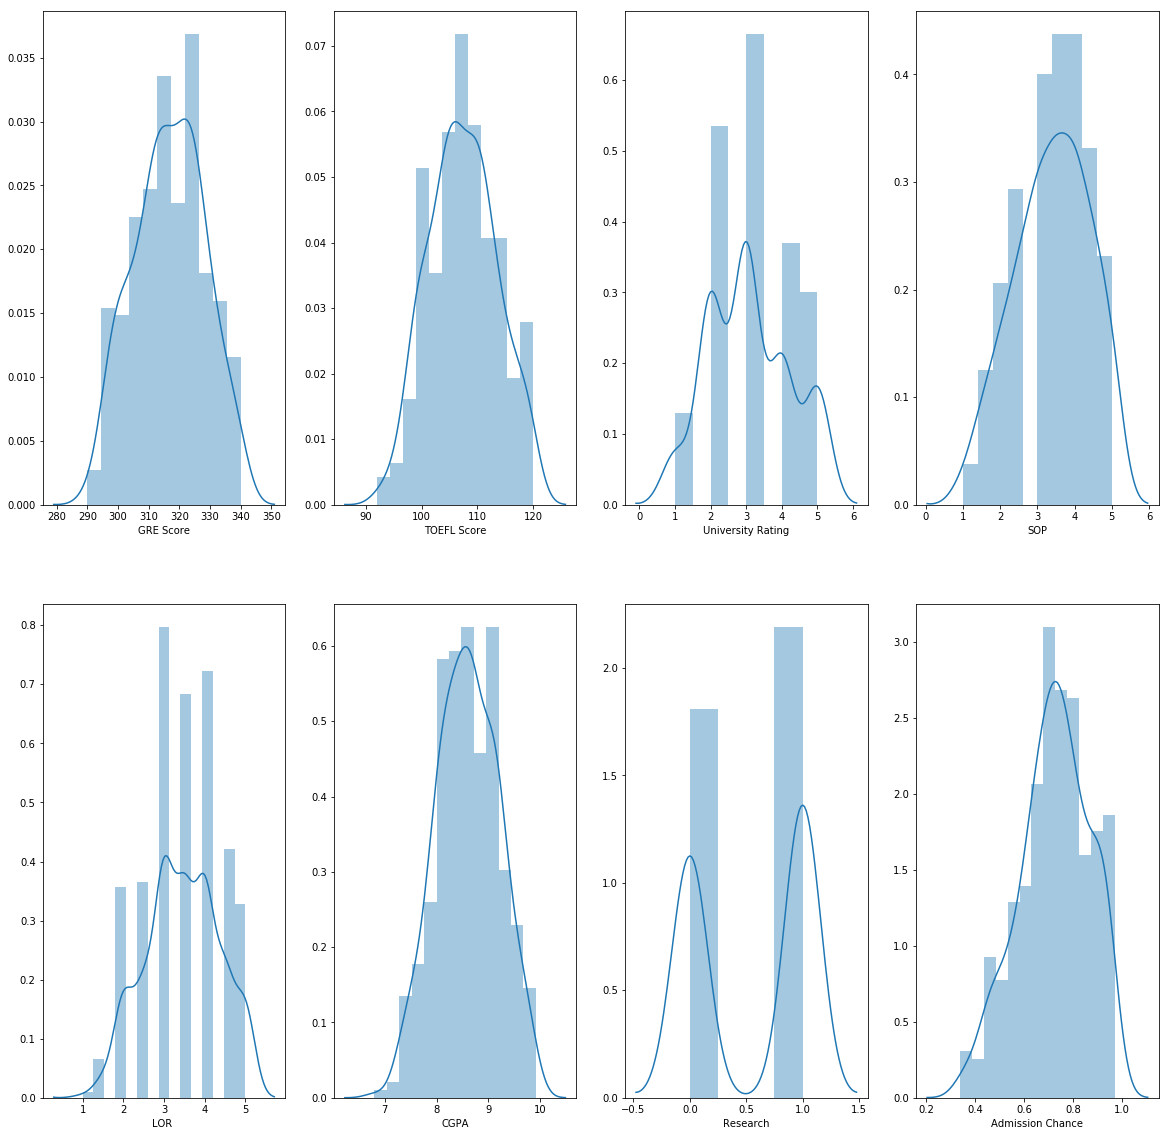

In [11]:
i = 1
fig, ax = plt.subplots(2, 4, figsize = (20, 20))

for column_header in column_headers:
    plt.subplot(2,4,i)
    sns.distplot(admission_df[column_header])
    i = i + 1


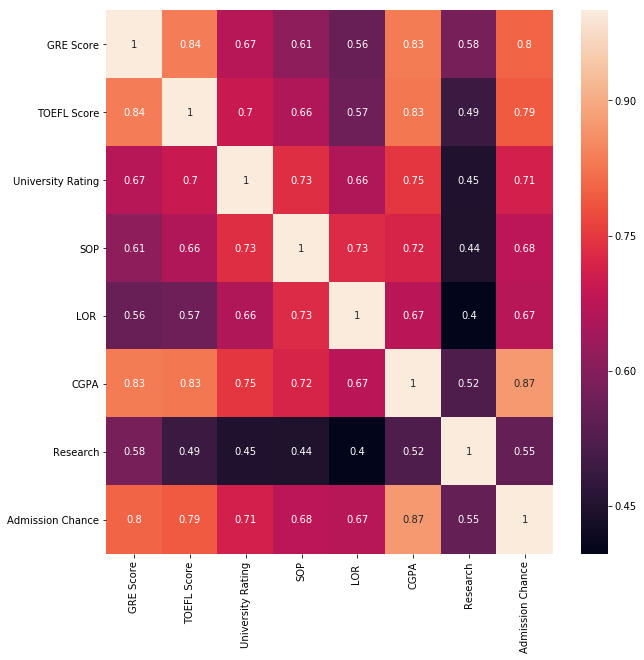

In [12]:
plt.figure(figsize = (10, 10))
sns.heatmap(admission_df.corr(), annot = True)

In [13]:
sns.pairplot(admission_df)

# CREATE TESTING AND TRAINING DATASET/DATA CLEANING

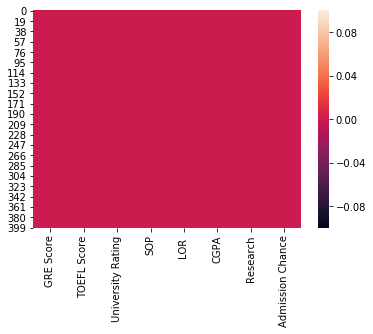

In [9]:
sns.heatmap(admission_df.isnull())

In [12]:
X = admission_df.drop(['Admission Chance'], axis = 1)
X.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0        337          118                  4  4.5   4.5  9.65         1
1        324          107                  4  4.0   4.5  8.87         1
2        316          104                  3  3.0   3.5  8.00         1
3        322          110                  3  3.5   2.5  8.67         1
4        314          103                  2  2.0   3.0  8.21         0

In [13]:
y = admission_df['Admission Chance']
y.head()


0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Admission Chance, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [15]:
X_train.shape

(320, 7)

In [16]:
X_test.shape

(80, 7)

# TRAINING THE MODEL

In [17]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
print('Linear Model Coeff (m)', regressor.coef_)
print('Linear Model Coeff (b)', regressor.intercept_)


Linear Model Coeff (m) [ 0.00147255  0.00249801  0.00908542 -0.00390275  0.01747781  0.12731224
  0.01916939]
Linear Model Coeff (b) -1.1881210826666941


# EVALUATING THE MODEL 

In [19]:
y_predict = regressor.predict(X_test)

In [20]:
plt.scatter(y_test, y_predict, color = 'r')
plt.ylabel('Model Predictions')
plt.xlabel('True (ground truth)')

Text(0.5,0,'True (ground truth)')

In [23]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)

In [25]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)) , '.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
MAPE = np.mean( np.abs((y_test - y_predict) /y_test ) ) * 100

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2, '\nMean Absolute Percentage Error =', MAPE, '%') 


RMSE = 0.074 
MSE = 0.00544116412227959 
MAE = 0.05151837296210049 
R2 = 0.7620204635112146 
Adjusted R2 = 0.7388835641303604 
Mean Absolute Percentage Error = 9.137379583060477 %


# RETRAIN AND VISUALIZE THE RESULTS - What if we only used The GRE and TOEFL scores ?

In [26]:
X = admission_df[[ 'GRE Score', 'TOEFL Score' ]]
y = admission_df['Admission Chance']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [28]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
y_predict = regressor.predict(X_test)

Text(0.5,0,'True (ground truth)')

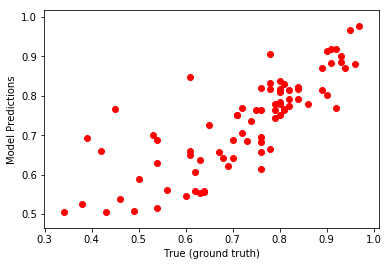

In [30]:
plt.scatter(y_test, y_predict, color = 'r')
plt.ylabel('Model Predictions')
plt.xlabel('True (ground truth)')

In [31]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)) , '.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
MAPE = np.mean( np.abs((y_test - y_predict) /y_test ) ) * 100

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2, '\nMean Absolute Percentage Error =', MAPE, '%') 



RMSE = 0.09 
MSE = 0.008051879706863118 
MAE = 0.063171823026107 
R2 = 0.6484660467329779 
Adjusted R2 = 0.6393352947000683 
Mean Absolute Percentage Error = 10.671926414712363 %
